# Jolteon Phase 1 Data Set Access 

JOLTEON (The JOint Lensed Transient Events Observation Network) aims to provide simulated resources to test methods to search for lensed transients. In this first round of the challenge we focused on identifying lensed transients from lightcurves. We did this by combining simulated transients from the ELASTICC2 dataset with additional lensed supernova simulations, both resolved and unresolved. 

In this notebook, we will show you how to access the test set we provided to train models/test methods.

## Imports

In [7]:
import astropy.table as at
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('./stylesheet/style.mplstyle')

In [106]:
# Define colour dictionary for plots
colors = {'u': '#9467bd', 'g': '#377eb8', 'r': '#4daf4a', 'i': '#e3c530', 'z': '#ff7f00'}
markers = {0: 'o', 1: '^'}

## Loading the Data

First, let's load one of the files. Similarly to SNANA outputs, our dataset is divided in *.HEAD files, in which one row corresponds to one lightcurve/transient; and *.PHOT files, which are collections of multiple lightcurves.

In [9]:
jolteon_head = at.Table(fits.open(f"/global/cfs/cdirs/lsst/www/jolteon/data/FINAL2/JOLTEON_FINAL_0000_HEAD.FITS")[1].data)
jolteon_phot = at.Table(fits.open(f"/global/cfs/cdirs/lsst/www/jolteon/data/FINAL2/JOLTEON_FINAL_0000_PHOT.FITS")[1].data)

In [85]:
# Choose one transient at random and print out its HEAD file row
idx = np.random.choice(len(jolteon_head))
print(jolteon_head[idx])

# The columns 'PTROBS_MIN' and 'PTROBS_MAX' point at the rows of the PHOT file that contain the lightcurve of this specific transient.
# We can access the light curve of individual objects using this key!
ptr_min = jolteon_head[idx]['PTROBS_MIN']
ptr_max = jolteon_head[idx]['PTROBS_MAX']
lc = jolteon_phot[ptr_min-1:ptr_max]

 SNID          RA                 DEC          MWEBV  MWEBV_ERR   SPECZ    SPECZ_ERR       PHOTOZ        PHOTOZ_ERR NOBS MJD_DETECT_FIRST MJD_DETECT_LAST PTROBS_MIN PTROBS_MAX      LABEL     
------ ------------------ ------------------- ------- --------- ---------- --------- ------------------ ----------- ---- ---------------- --------------- ---------- ---------- ---------------
100534 163.25527954101562 -29.792203903198242 -9999.0   -9999.0 0.93143797    0.0001 0.9736479763720344 0.037200395  157       61336.3616      61875.2089     100533     100689 SNII+HostXT_V19


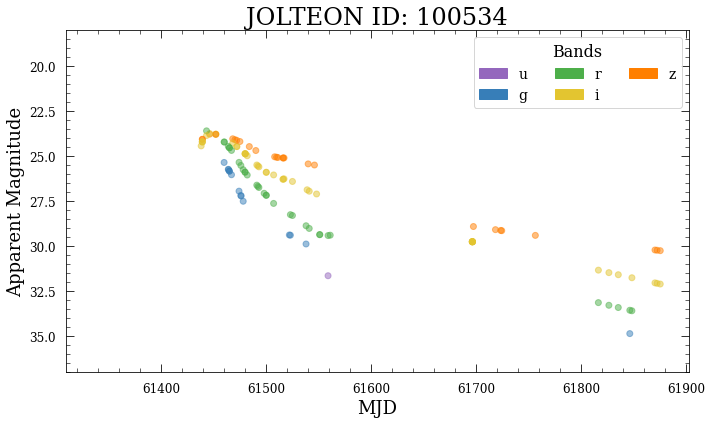

In [100]:
# Plot the apparent magnitude of the transient as simulated

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.scatter(lc['MJD'], lc['SIM_MAGOBS'], c=[colors[band] for band in lc['BAND']], alpha = 0.5)
ax.set_ylim(37,18)

# Create legend patches
legend_patches = [mpatches.Patch(color=color, label=band.strip()) for band, color in colors.items()]

# Add legend
ax.legend(handles=legend_patches, title="Bands", fontsize=14, title_fontsize=16, ncol=3)
ax.set_xlabel("MJD", fontsize=18)
ax.set_ylabel("Apparent Magnitude", fontsize=18)
ax.set_title(f'JOLTEON ID: {jolteon_head[idx]["SNID"]}', fontsize=24)
fig.tight_layout()
fig.show()

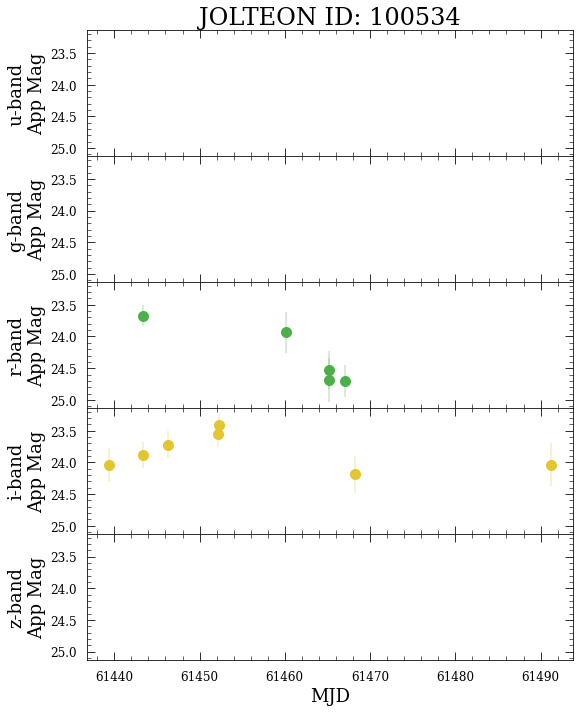

In [101]:
# Choose a band (the r band for example) and plot the flux of all photometry with at least 3 SNR

fig, ax = plt.subplots(len(colors.keys()), 1, figsize=(8,10), sharex=True, sharey=True)
ax[0].invert_yaxis()
for b, pb_id in enumerate(colors.keys()):
    single_band = lc[lc['BAND']==pb_id]
    single_band_3s = single_band[single_band['FLUXCAL']/single_band['FLUXCALERR']>=3]

    mag = -2.5 * np.log10(single_band_3s['FLUXCAL']) + 27.5
    mag_err = np.abs(-2.5 * single_band_3s['FLUXCALERR']/(np.log(10)*single_band_3s['FLUXCAL']))

    _, _, bars = ax[b].errorbar(single_band_3s['MJD'], mag, yerr=mag_err, c=colors[pb_id], marker='o', ms=10, ls='None')
    [bar.set_alpha(0.3) for bar in bars]

    ax[b].set_ylabel(f"{pb_id}-band\nApp Mag", fontsize=18)

ax[-1].set_xlabel("MJD", fontsize=18)
ax[0].set_title(f'JOLTEON ID: {jolteon_head[idx]["SNID"]}', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.show()

In [102]:
# Multiply-imaged resolved lensed objects can be identified in the test set by their shared SNID.

jolteon_head[jolteon_head['LABEL']=='glSNIa_ASM']

SNID,RA,DEC,MWEBV,MWEBV_ERR,SPECZ,SPECZ_ERR,PHOTOZ,PHOTOZ_ERR,NOBS,MJD_DETECT_FIRST,MJD_DETECT_LAST,PTROBS_MIN,PTROBS_MAX,LABEL
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,str22
100101,36.5495974797036,-22.91199859622375,-9999.0,-9999.0,0.2116312044949553,0.0001,0.2039577456206909,0.033486865,231,60910.3092,61848.0056,17828,18058,glSNIa_ASM
100101,35.996796722810984,-23.93587474414309,-9999.0,-9999.0,0.2116312044949553,0.0001,0.2039577456206909,0.033486865,231,60910.3092,61848.0056,18060,18290,glSNIa_ASM
100137,200.56091323548478,-35.907990114931664,-9999.0,-9999.0,0.1740570845640322,0.0001,0.20221171406534796,0.025207955,246,60796.0231,61876.3084,23811,24056,glSNIa_ASM
100137,201.96451290344683,-36.1792708729158,-9999.0,-9999.0,0.1740570845640322,0.0001,0.20221171406534796,0.025207955,246,60796.0231,61876.3084,24058,24303,glSNIa_ASM
100487,201.48945956118953,-65.45595624439977,-9999.0,-9999.0,0.3758524755924145,0.0001,0.36126420367322226,0.054154184,230,60796.0191,61888.21,93046,93275,glSNIa_ASM
100504,299.364334130917,0.8633731495355856,-9999.0,-9999.0,0.4821243890862027,0.0001,0.46149571194212324,0.042383563,141,60816.3832,61891.3559,96074,96214,glSNIa_ASM
100504,299.873289570798,-1.5509333831796805,-9999.0,-9999.0,0.4821243890862027,0.0001,0.46149571194212324,0.042383563,141,60816.3832,61891.3559,96216,96356,glSNIa_ASM
100536,338.59094604929663,-13.903856245930857,-9999.0,-9999.0,0.2098167628440941,0.0001,0.3520728718945323,0.085120454,224,60846.4455,61895.3959,100829,101052,glSNIa_ASM
100536,338.9046169733802,-15.252218937678894,-9999.0,-9999.0,0.2098167628440941,0.0001,0.3520728718945323,0.085120454,224,60846.4455,61895.3959,101054,101277,glSNIa_ASM


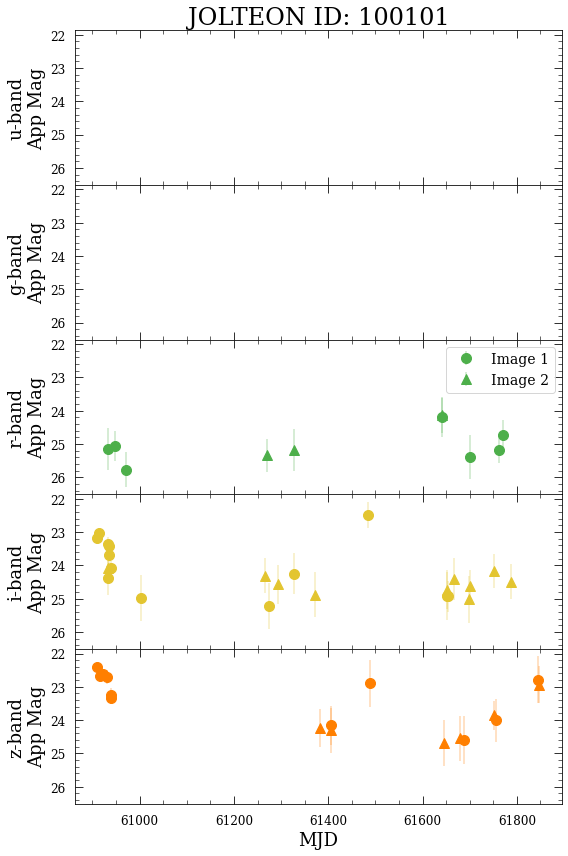

In [111]:
# Let's choose one and plot the i band simulated lc for these two images:

glSN_id = 100101
glSN = jolteon_head[jolteon_head['SNID'] == glSN_id]

fig, ax = plt.subplots(len(colors.keys()), 1, figsize=(8,12), sharex=True, sharey=True)
ax[0].invert_yaxis()
for (image,row) in enumerate(glSN):
    ptr_min = row['PTROBS_MIN']-1
    ptr_max = row['PTROBS_MAX']
    lc_glSN = jolteon_phot[ptr_min:ptr_max]

    for b, pb_id in enumerate(colors.keys()):
        single_band = lc_glSN[lc_glSN['BAND']==pb_id]
        single_band_1s = single_band[single_band['FLUXCAL']/single_band['FLUXCALERR']>=1.5]

        mag = -2.5 * np.log10(single_band_1s['FLUXCAL']) + 27.5
        mag_err = np.abs(-2.5 * single_band_1s['FLUXCALERR']/(np.log(10)*single_band_1s['FLUXCAL']))

        _, _, bars = ax[b].errorbar(single_band_1s['MJD'], mag, yerr=mag_err, c=colors[pb_id], marker=markers[image],
                                    ms=10, ls='None', label=f'Image {image+1}')
        [bar.set_alpha(0.3) for bar in bars]

        ax[b].set_ylabel(f"{pb_id}-band\nApp Mag", fontsize=18)

ax[2].legend(fontsize=14)
ax[-1].set_xlabel("MJD", fontsize=18)
ax[0].set_title(f'JOLTEON ID: {glSN_id}', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.show()